In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Functions

columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Outcome']
sns.set(style='whitegrid')
sns.set_palette('pastel')

def draw_histograms(data_to_draw, name):
    f, axes = plt.subplots(3, 3, figsize=(15, 15))
    b = 15
    for i in range(len(columns)):
        # Draw the plot
        row = int(i / 3)
        col = i % 3        
        sns.distplot(data_to_draw[columns[i]], kde=False, ax=axes[row, col], bins=b)
        
    plt.savefig('doc/images/{}.jpg'.format(name), dpi = 300)
        

def printBoxPlots(data_to_print, name):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))

    for i in range(len(columns)):
        if (columns[i] == 'Outcome'):
            continue

        row = int(i / 3)
        col = i % 3

        sns.boxplot(columns[i], data=data_to_print, ax=axes[row, col], orient='v')
    plt.savefig('doc/images/{}.jpg'.format(name), dpi = 300)

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

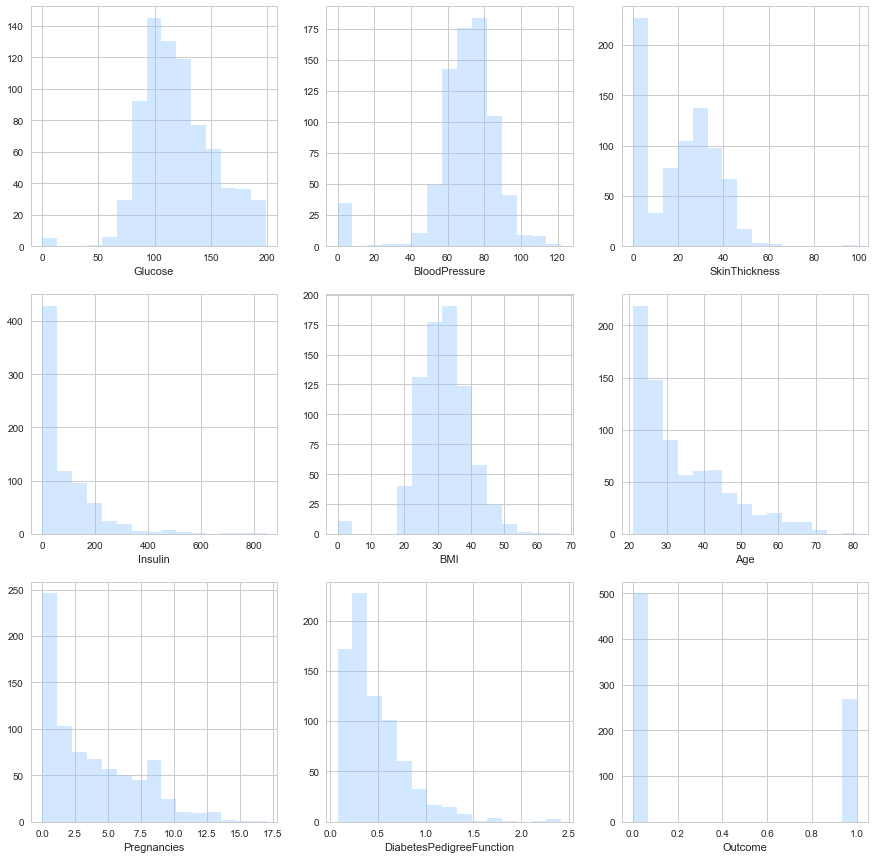

In [6]:
draw_histograms(data, 'histograms')

<Figure size 1440x1440 with 0 Axes>

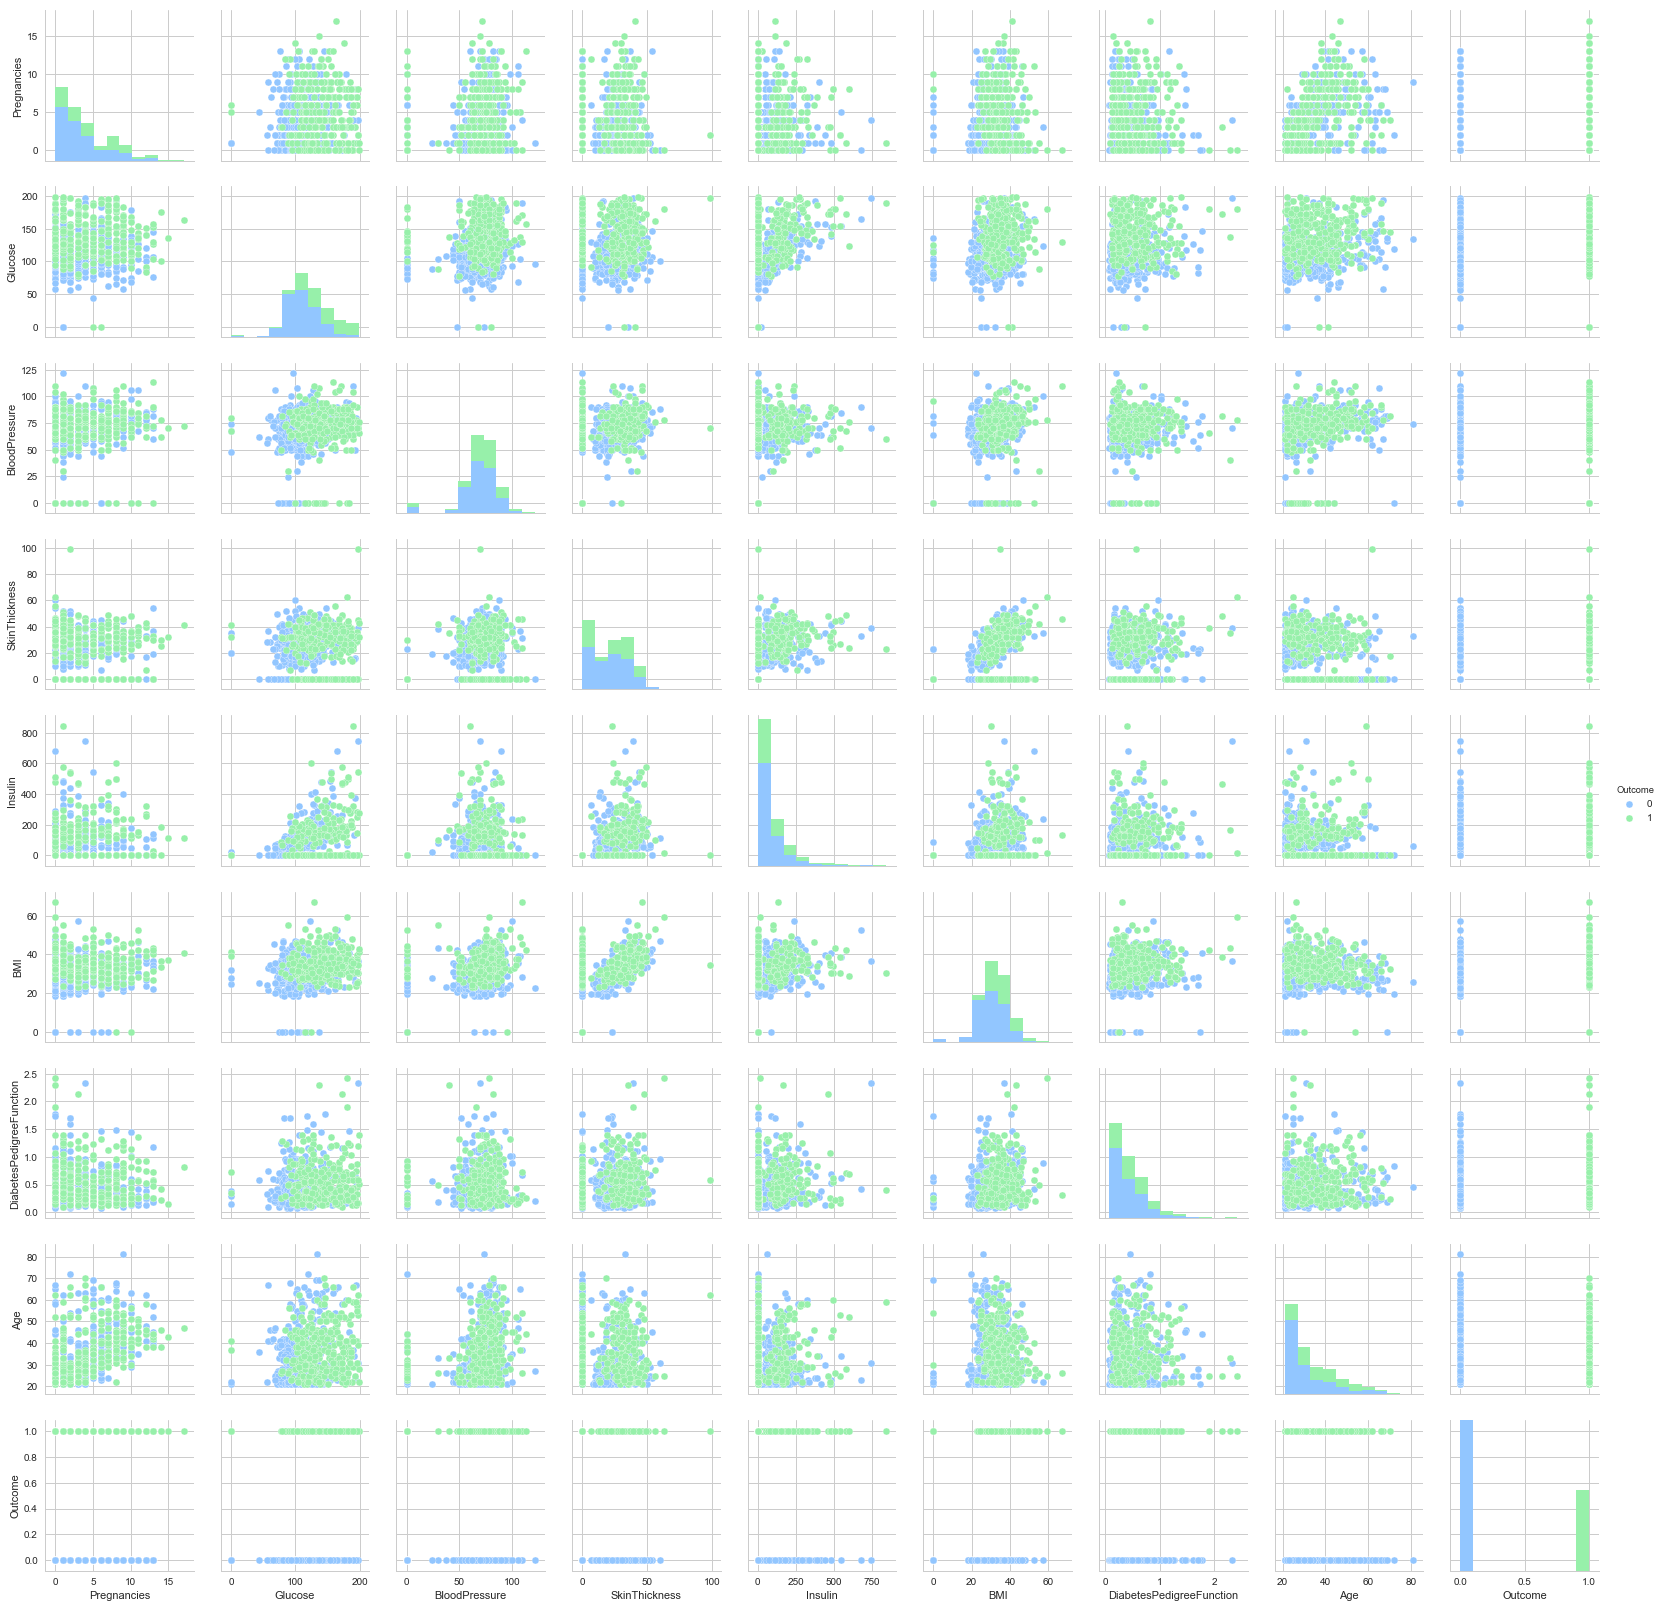

In [7]:
plt.figure(figsize=(20,20))
sns.pairplot(data, hue='Outcome')
plt.savefig('doc/images/{}.jpg'.format('pairplot'), dpi = 300)

## Wartości zerowe zastępujemy średnią

In [8]:
import copy

col_names = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

data_average = copy.deepcopy(data)

for col_name in col_names:
    average = round(data_average[col_name].mean(skipna=True), 1 if col_name == 'BMI' else 0)
    data_average[col_name] = data_average[col_name].replace(0, average)

data_average['DiabetesPedigreeFunction'] = data_average['DiabetesPedigreeFunction'].round(3)

W przypadku \textit{Pregnancies} występują wartości 0, ale są poprawne. Wartość 0 oznacza, że kobieta nie była dotychczas w ciąży.

In [9]:
data_average.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.250000,26.743490,118.757812,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.117203,9.546733,93.039581,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.000000,80.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,80.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

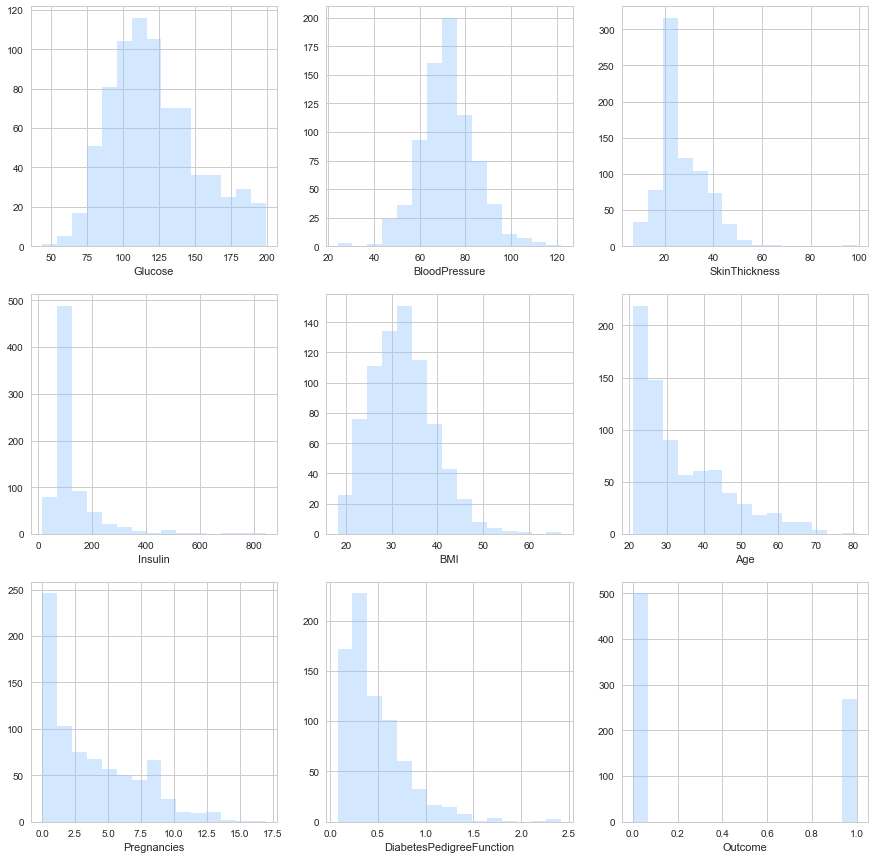

In [10]:
draw_histograms(data_average, 'histograms_average')

In [11]:
data_average.to_csv('diabetes_average.csv', index=None)

## Wartości zerowe zastępujemy medianą

In [12]:
col_names = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

data_median = copy.deepcopy(data)

for col_name in col_names:
    average = round(data_median[col_name].median(skipna=True), 1 if col_name == 'BMI' else 0)
    data_median[col_name] = data_median[col_name].replace(0, average)

data_median['DiabetesPedigreeFunction'] = data_median['DiabetesPedigreeFunction'].round(3)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

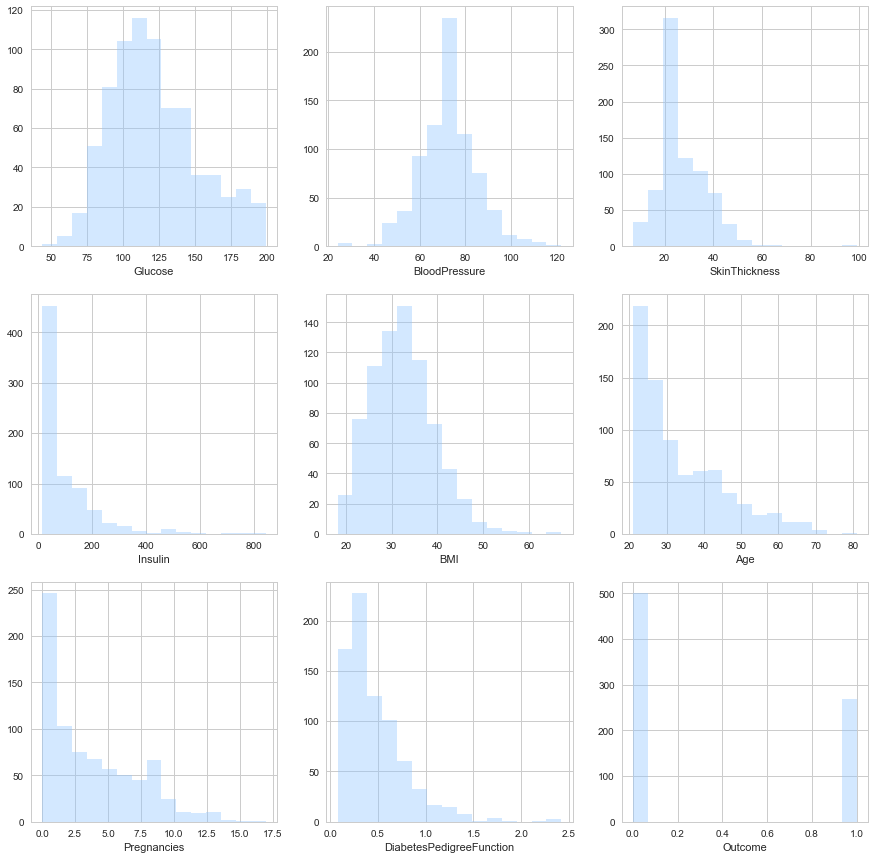

In [13]:
draw_histograms(data_median, 'histogram_median')

In [14]:
data_median.to_csv('diabetes_median.csv', index=None)

## Wyrzucenie danych, gdzie wartość pól BMI, BloodPressure, Glucose wynosi 0

In [15]:
data_drop_zeros = data[(data.BloodPressure != 0) & (data.BMI != 0) & (data.Glucose != 0)]
data_drop_zeros.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
data_drop_zeros.to_csv('diabetes_drop_zeros.csv', index=None)

## Usunięcie wartości odstających

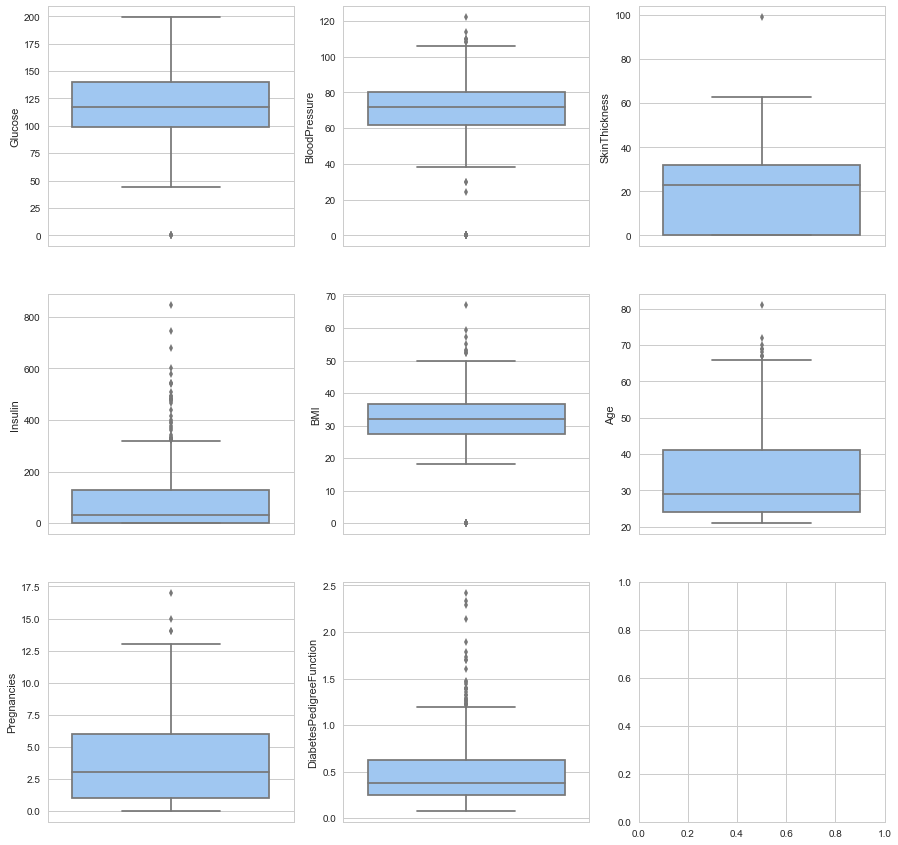

In [17]:
printBoxPlots(data, 'boxplots')

### Pierwszy sposób na usunięcie odstających

In [18]:
no_drop_columns = ['Pregnancies', 'Age', 'Outcome']
#no_drop_columns = []

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


#### Usunięcie wartości odstających

In [19]:
def outliers(x):
    if x.name in no_drop_columns:
        return x > 1000
    return (x < (Q1[x.name] - 1.5 * IQR[x.name])) | (x > (Q3[x.name] + 1.5 * IQR[x.name]))

data_out = data[~data.apply(outliers).any(axis=1)]
data_out.shape

(650, 9)

#### Ile procent danych zostało usunietych

In [20]:
def count_outliers_removed(data_with_removed):
    return 100 * (1 - (data_with_removed.count()['BMI'] / data.count()['BMI']))
    
count_outliers_removed(data_out)

15.364583333333337

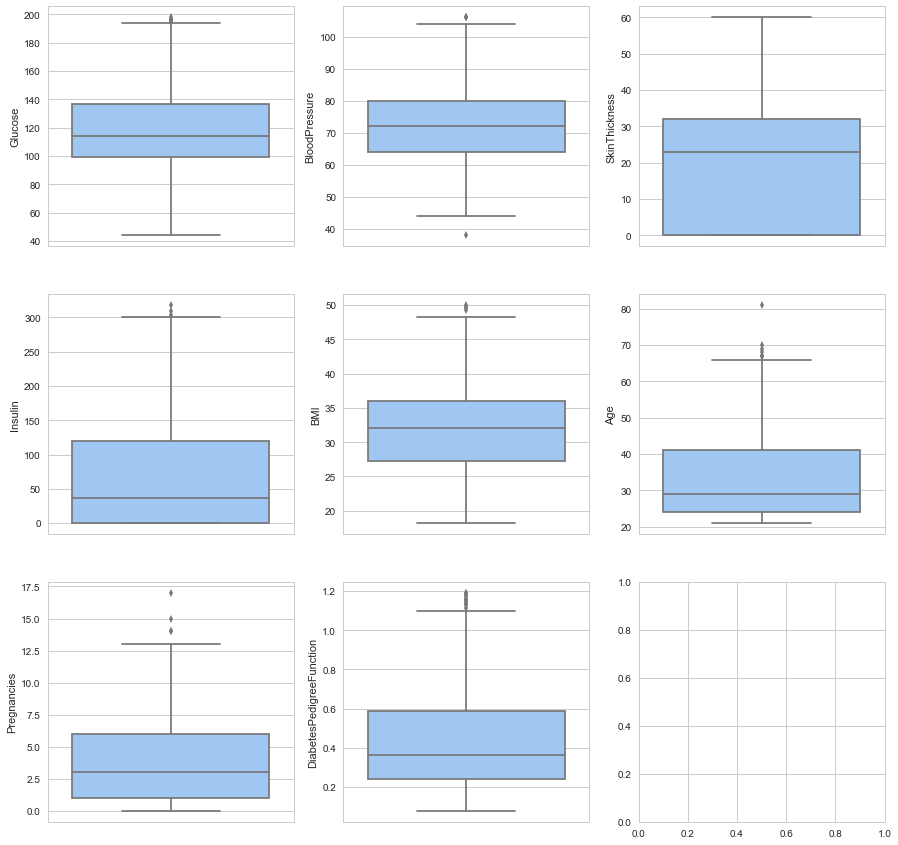

In [21]:
printBoxPlots(data_out, 'boxplot_removed_outliers')

In [22]:
data_out.to_csv('diabetes_out1.csv', index=None)

### Drugi sposób na usunięcie odstających

In [23]:
def outliers2(x):
    if x.name in no_drop_columns:
        return x > 1000
    return np.abs(x - x.median()) > 1.5*(x.quantile(.75)-x.quantile(0.25))

data_out2 = data[~data.apply(outliers2).any(axis=1)]
data_out2.shape

(543, 9)

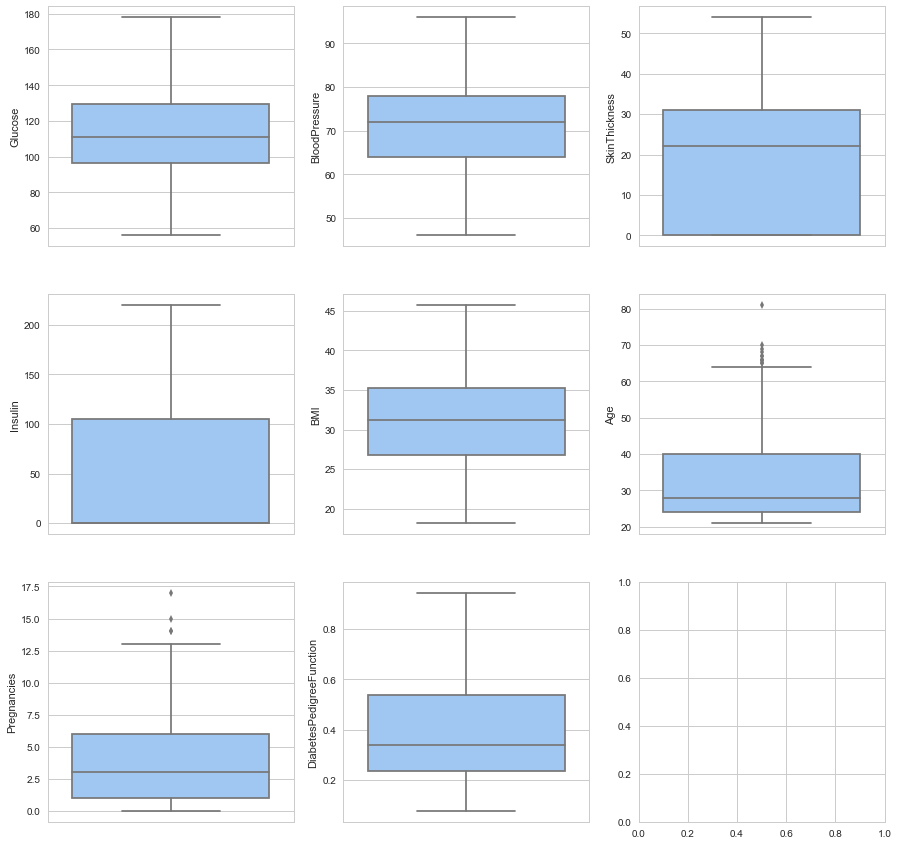

In [24]:
printBoxPlots(data_out2, 'boxplots_removed_outliers2')

#### Ile procent danych zostało usunietych

In [25]:
def count_outliers_removed(data_with_removed):
    return 100 * (1 - (data_with_removed.count()['BMI'] / data.count()['BMI']))
    
count_outliers_removed(data_out2)

29.296875

In [26]:
data_out2.to_csv('diabetes_out2.csv', index=None)

## Selekcja cech

In [63]:
from sklearn.ensemble import ExtraTreesClassifier

In [64]:
array = data_median.values
# print(array)
X = array[:, 0:-1]
Y = array[:, -1]
cls = ExtraTreesClassifier()
cls.fit(X, Y)
print(cls.feature_importances_)

[0.1033429  0.24400147 0.10518498 0.08396726 0.08931613 0.1273822
 0.11443045 0.13237461]


In [65]:
data_median.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30,33.6,0.627,50,1
1,1,85,66,29,30,26.6,0.351,31,0
2,8,183,64,23,30,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
data_new = data_median.drop(['BloodPressure', 'Insulin'], axis=1)

In [67]:
data_new.to_csv('diabetes_final.csv', index=None)